In [4]:
import os
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

In [ ]:
values = {"01":[]}

In [16]:
file_path = f"{os.getcwd()}\covid_19_clean_complete.csv"
file_path

df = pd.read_csv(file_path)
df = df.drop(["Province/State","Lat","Long"],axis=1)

df_brazil = df[df["Country/Region"].str.contains("Brazil", na=False)]


df_brazil = df_brazil[(df_brazil["Confirmed"] != 0) & 
                      (df_brazil["Deaths"] != 0) & 
                      (df_brazil["Recovered"] != 0)]

df_brazil["Date"] = pd.to_datetime(df_brazil["Date"],format="%Y-%m-%d")
monthly_deaths = df_brazil.groupby('Date')['Deaths'].sum()
monthly_Confirmed = df_brazil.groupby('Date')['Confirmed'].sum()
monthly_Recovered = df_brazil.groupby('Date')['Recovered'].sum()


print(monthly_deaths,monthly_Confirmed,monthly_Recovered)

Date
2020-03-17        1
2020-03-18        3
2020-03-19        6
2020-03-20       11
2020-03-21       15
              ...  
2020-07-23    84082
2020-07-24    85238
2020-07-25    86449
2020-07-26    87004
2020-07-27    87618
Name: Deaths, Length: 133, dtype: int64 Date
2020-03-17        321
2020-03-18        372
2020-03-19        621
2020-03-20        793
2020-03-21       1021
               ...   
2020-07-23    2287475
2020-07-24    2343366
2020-07-25    2394513
2020-07-26    2419091
2020-07-27    2442375
Name: Confirmed, Length: 133, dtype: int64 Date
2020-03-17          2
2020-03-18          2
2020-03-19          2
2020-03-20          2
2020-03-21          2
               ...   
2020-07-23    1620313
2020-07-24    1693214
2020-07-25    1785359
2020-07-26    1812913
2020-07-27    1846641
Name: Recovered, Length: 133, dtype: int64


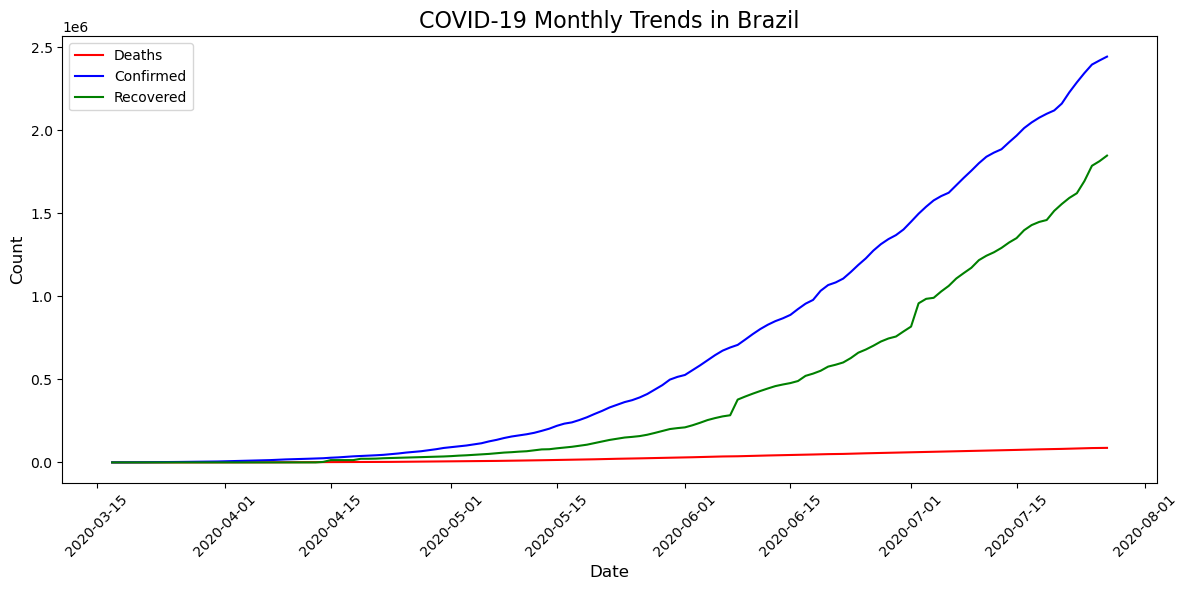

In [17]:
import matplotlib.pyplot as plt

# Assuming the datasets are pandas Series
# Rename columns for clarity if needed
monthly_deaths.name = "Deaths"
monthly_Confirmed.name = "Confirmed"
monthly_Recovered.name = "Recovered"

# Create the plot
plt.figure(figsize=(12, 6))  # Set figure size

# Plot each dataset
plt.plot(monthly_deaths.index, monthly_deaths.values, label="Deaths", color="red")
plt.plot(monthly_Confirmed.index, monthly_Confirmed.values, label="Confirmed", color="blue")
plt.plot(monthly_Recovered.index, monthly_Recovered.values, label="Recovered", color="green")

# Add labels and title
plt.title("COVID-19 Monthly Trends in Brazil", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add a legend
plt.legend(loc="upper left")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()
